<a href="https://colab.research.google.com/github/Rakshitha0312/Hospital-Readmission-prediction/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_df = pd.read_csv("/content/test-1617360461595-1660719701431.csv")
train_df = pd.read_csv("/content/Train-1617360447408-1660719685476.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [ ]:
numerical_data = train_df.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlation_matrix = numerical_data.corr()

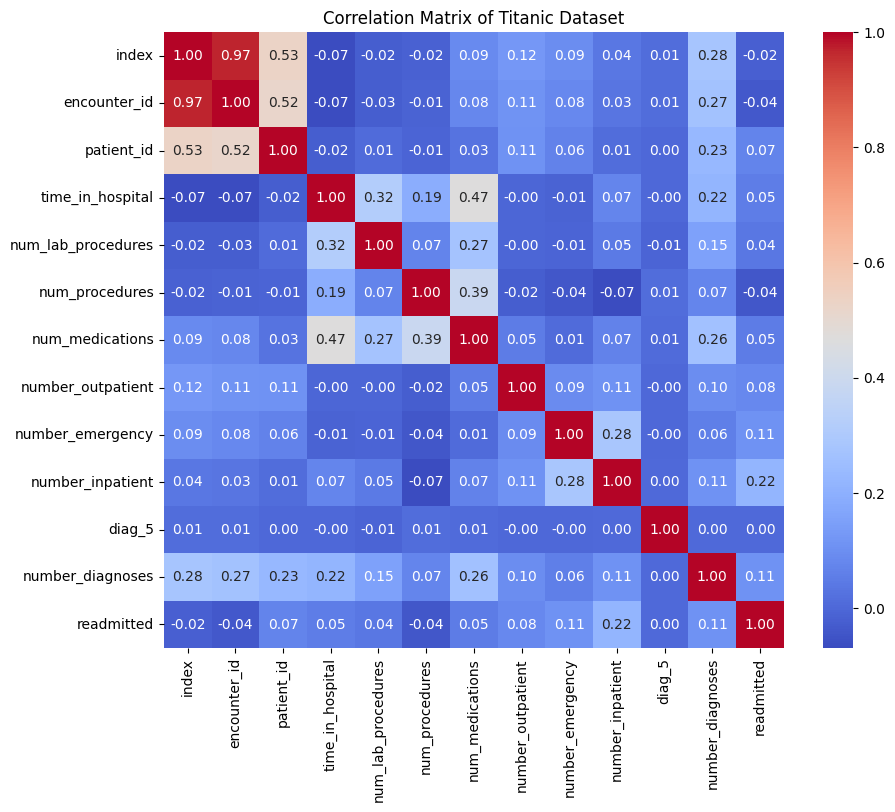

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

In [ ]:
train_df.isnull().sum()

,0
index,0
encounter_id,0
patient_id,0
race,0
gender,0
age,0
weight,0
time_in_hospital,0
medical_specialty,0
num_lab_procedures,0


In [ ]:
train_df = train_df.drop(['X1','X2'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['race_encoded'] = le.fit_transform(train_df['race'])

In [ ]:
train_df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted,race_encoded
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,Yes,1,4
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,0,3
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,Down,No,No,No,No,No,Ch,Yes,1,3
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,Down,No,No,No,No,No,Ch,Yes,1,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,1,3


In [ ]:
train_df = train_df.drop(['race'],axis=1)

In [ ]:
le = LabelEncoder()
train_df['gender_encoded'] = le.fit_transform(train_df['gender'])

In [ ]:
train_df.head()

,index,encounter_id,patient_id,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,X21,X22,X23,X24,X25,change,diabetesMed,readmitted,race_encoded,gender_encoded
0,69375,197029140,51521940,Male,[80-90),?,4,Emergency/Trauma,39,1,...,No,No,No,No,No,No,Yes,1,4,1
1,57272,163571946,92631357,Male,[60-70),?,3,Emergency/Trauma,34,1,...,No,No,No,No,No,No,No,0,3,1
2,82347,256497366,30023982,Female,[50-60),?,6,Nephrology,50,2,...,No,No,No,No,No,Ch,Yes,1,3,0
3,89608,289891212,93606021,Female,[70-80),?,5,?,63,0,...,No,No,No,No,No,Ch,Yes,1,1,0
4,24091,81873900,23464296,Male,[70-80),?,9,Psychiatry,17,1,...,No,No,No,No,No,No,No,1,3,1


In [ ]:
train_df = train_df.drop(['gender'],axis=1)

In [ ]:
print(train_df['weight'].value_counts(dropna=False))

weight
?            64454
[75-100)       900
[50-75)        603
[100-125)      416
[125-150)      104
[25-50)         52
[0-25)          26
[150-175)       20
[175-200)        8
>200             4
Name: count, dtype: int64


In [ ]:
train_df= train_df.drop(['weight'],axis=1)

In [ ]:
print(train_df['age'].value_counts(dropna=False))

age
[70-80)     17031
[60-70)     14845
[50-60)     11378
[80-90)     11080
[40-50)      6324
[30-40)      2414
[90-100)     1833
[20-30)      1154
[10-20)       428
[0-10)        100
Name: count, dtype: int64


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   age                 66587 non-null  object 
 4   time_in_hospital    66587 non-null  int64  
 5   medical_specialty   66587 non-null  object 
 6   num_lab_procedures  66587 non-null  int64  
 7   num_procedures      66587 non-null  int64  
 8   num_medications     66587 non-null  int64  
 9   number_outpatient   66587 non-null  int64  
 10  number_emergency    66587 non-null  int64  
 11  number_inpatient    66587 non-null  int64  
 12  diag_1              66587 non-null  object 
 13  diag_2              66587 non-null  object 
 14  diag_3              66587 non-null  object 
 15  diag_4              66587 non-null  object 
 16  diag

In [ ]:
train_df = pd.get_dummies(train_df, columns=['age'], drop_first=True)

In [ ]:
train_df.head()

,index,encounter_id,patient_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,gender_encoded,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,69375,197029140,51521940,4,Emergency/Trauma,39,1,9,1,1,...,1,False,False,False,False,False,False,False,True,False
1,57272,163571946,92631357,3,Emergency/Trauma,34,1,12,0,0,...,1,False,False,False,False,False,True,False,False,False
2,82347,256497366,30023982,6,Nephrology,50,2,24,0,0,...,0,False,False,False,False,True,False,False,False,False
3,89608,289891212,93606021,5,?,63,0,14,0,0,...,0,False,False,False,False,False,False,True,False,False
4,24091,81873900,23464296,9,Psychiatry,17,1,11,0,0,...,1,False,False,False,False,False,False,True,False,False


In [ ]:
for col in train_df.select_dtypes(include=['bool']).columns:
    train_df[col] = train_df[col].astype(int)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   time_in_hospital    66587 non-null  int64  
 4   medical_specialty   66587 non-null  object 
 5   num_lab_procedures  66587 non-null  int64  
 6   num_procedures      66587 non-null  int64  
 7   num_medications     66587 non-null  int64  
 8   number_outpatient   66587 non-null  int64  
 9   number_emergency    66587 non-null  int64  
 10  number_inpatient    66587 non-null  int64  
 11  diag_1              66587 non-null  object 
 12  diag_2              66587 non-null  object 
 13  diag_3              66587 non-null  object 
 14  diag_4              66587 non-null  object 
 15  diag_5              66587 non-null  float64
 16  numb

In [ ]:
print(train_df['diabetesMed'].unique())

['Yes' 'No']


In [ ]:
print(train_df['change'].unique())

['No' 'Ch']


In [ ]:
print(train_df['number_diagnoses'].unique())

[ 9  6  7  5  4  2  8  3  1 16 10 12 13 14 11 15]


In [ ]:
print(train_df['number_inpatient'].unique())

[ 4  0  5  1  3  2  6  9  7 10  8 11 15 14 12 13 19 16 18]


In [ ]:
print(train_df['number_emergency'].unique())

[ 1  0  3  2  6  8  5  4 12  7 20 19  9 16 10 18 63 13 11 22 15 28 25 21
 24 46]


In [ ]:
print(train_df['number_outpatient'].unique())

[ 1  0  2  3 25  6  4  5  7 16  8 12  9 10 36 21 33 15 17 11 14 13 26 39
 22 23 34 38 27 24 29 20 18]


In [ ]:
print(train_df['num_medications'].unique())

[ 9 12 24 14 11 13 17 32 28 38 18 19  1 26  4 10  7 29 16 15  3  6 21 23
  8 25 22 20  2 35 40 27 31 30  5 47 39 34 33 44 43 57 36 64 45 41 37 49
 50 52 63 53 42 58 48 61 59 62 60 67 66 51 55 70 56 46 68 54 81 65 69]


In [ ]:
print(train_df['medical_specialty'].unique())

['Emergency/Trauma' 'Nephrology' '?' 'Psychiatry' 'Family/GeneralPractice'
 'InternalMedicine' 'ObstetricsandGynecology' 'Cardiology' 'Oncology'
 'PhysicianNotFound' 'Orthopedics' 'PhysicalMedicineandRehabilitation'
 'Gastroenterology' 'Urology' 'Radiologist' 'Hematology/Oncology'
 'Orthopedics-Reconstructive' 'Surgery-General' 'Pediatrics' 'Surgeon'
 'Gynecology' 'Pediatrics-Endocrinology' 'Pulmonology' 'Surgery-Vascular'
 'Anesthesiology' 'Surgery-Neuro' 'Surgery-Thoracic'
 'Surgery-Cardiovascular/Thoracic' 'Surgery-Cardiovascular' 'Pathology'
 'Podiatry' 'Neurology' 'Obsterics&Gynecology-GynecologicOnco' 'Radiology'
 'Otolaryngology' 'Psychology' 'Hematology' 'Psychiatry-Child/Adolescent'
 'Endocrinology' 'Dentistry' 'Rheumatology' 'Pediatrics-CriticalCare'
 'Ophthalmology' 'Obstetrics' 'SurgicalSpecialty' 'Pediatrics-Pulmonology'
 'Anesthesiology-Pediatric' 'Proctology' 'Hospitalist' 'Osteopath'
 'Surgery-Plastic' 'Speech' 'AllergyandImmunology' 'OutreachServices'
 'InfectiousDisea

In [ ]:
train_df['medical_specialty'] = train_df['medical_specialty'].replace('?', np.nan)

In [ ]:
mode_medical_specialty = train_df['medical_specialty'].mode()[0]
train_df['medical_specialty'].fillna(mode_medical_specialty, inplace=True)

/tmp/ipython-input-1630017252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['medical_specialty'].fillna(mode_medical_specialty, inplace=True)


In [ ]:
mode_medical_specialty = train_df['medical_specialty'].mode()[0]
train_df['medical_specialty'] = train_df['medical_specialty'].fillna(mode_medical_specialty)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['medical_specialty_encoded'] = le.fit_transform(train_df['medical_specialty'])
train_df = train_df.drop('medical_specialty', axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      66587 non-null  int64  
 1   encounter_id               66587 non-null  int64  
 2   patient_id                 66587 non-null  int64  
 3   time_in_hospital           66587 non-null  int64  
 4   num_lab_procedures         66587 non-null  int64  
 5   num_procedures             66587 non-null  int64  
 6   num_medications            66587 non-null  int64  
 7   number_outpatient          66587 non-null  int64  
 8   number_emergency           66587 non-null  int64  
 9   number_inpatient           66587 non-null  int64  
 10  diag_1                     66587 non-null  object 
 11  diag_2                     66587 non-null  object 
 12  diag_3                     66587 non-null  object 
 13  diag_4                     66587 non-null  obj

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_columns_to_encode = [
    'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
    'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
    'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25'
]

for col in x_columns_to_encode:
    train_df[col] = le.fit_transform(train_df[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

remaining_object_cols = [
    'diag_1', 'diag_2', 'diag_3', 'diag_4',
    'change', 'diabetesMed'
]

for col in remaining_object_cols:
    train_df[col] = le.fit_transform(train_df[col])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      66587 non-null  int64  
 1   encounter_id               66587 non-null  int64  
 2   patient_id                 66587 non-null  int64  
 3   time_in_hospital           66587 non-null  int64  
 4   num_lab_procedures         66587 non-null  int64  
 5   num_procedures             66587 non-null  int64  
 6   num_medications            66587 non-null  int64  
 7   number_outpatient          66587 non-null  int64  
 8   number_emergency           66587 non-null  int64  
 9   number_inpatient           66587 non-null  int64  
 10  diag_1                     66587 non-null  int64  
 11  diag_2                     66587 non-null  int64  
 12  diag_3                     66587 non-null  int64  
 13  diag_4                     66587 non-null  int

In [ ]:
correlation_matrix1 = train_df.corr()

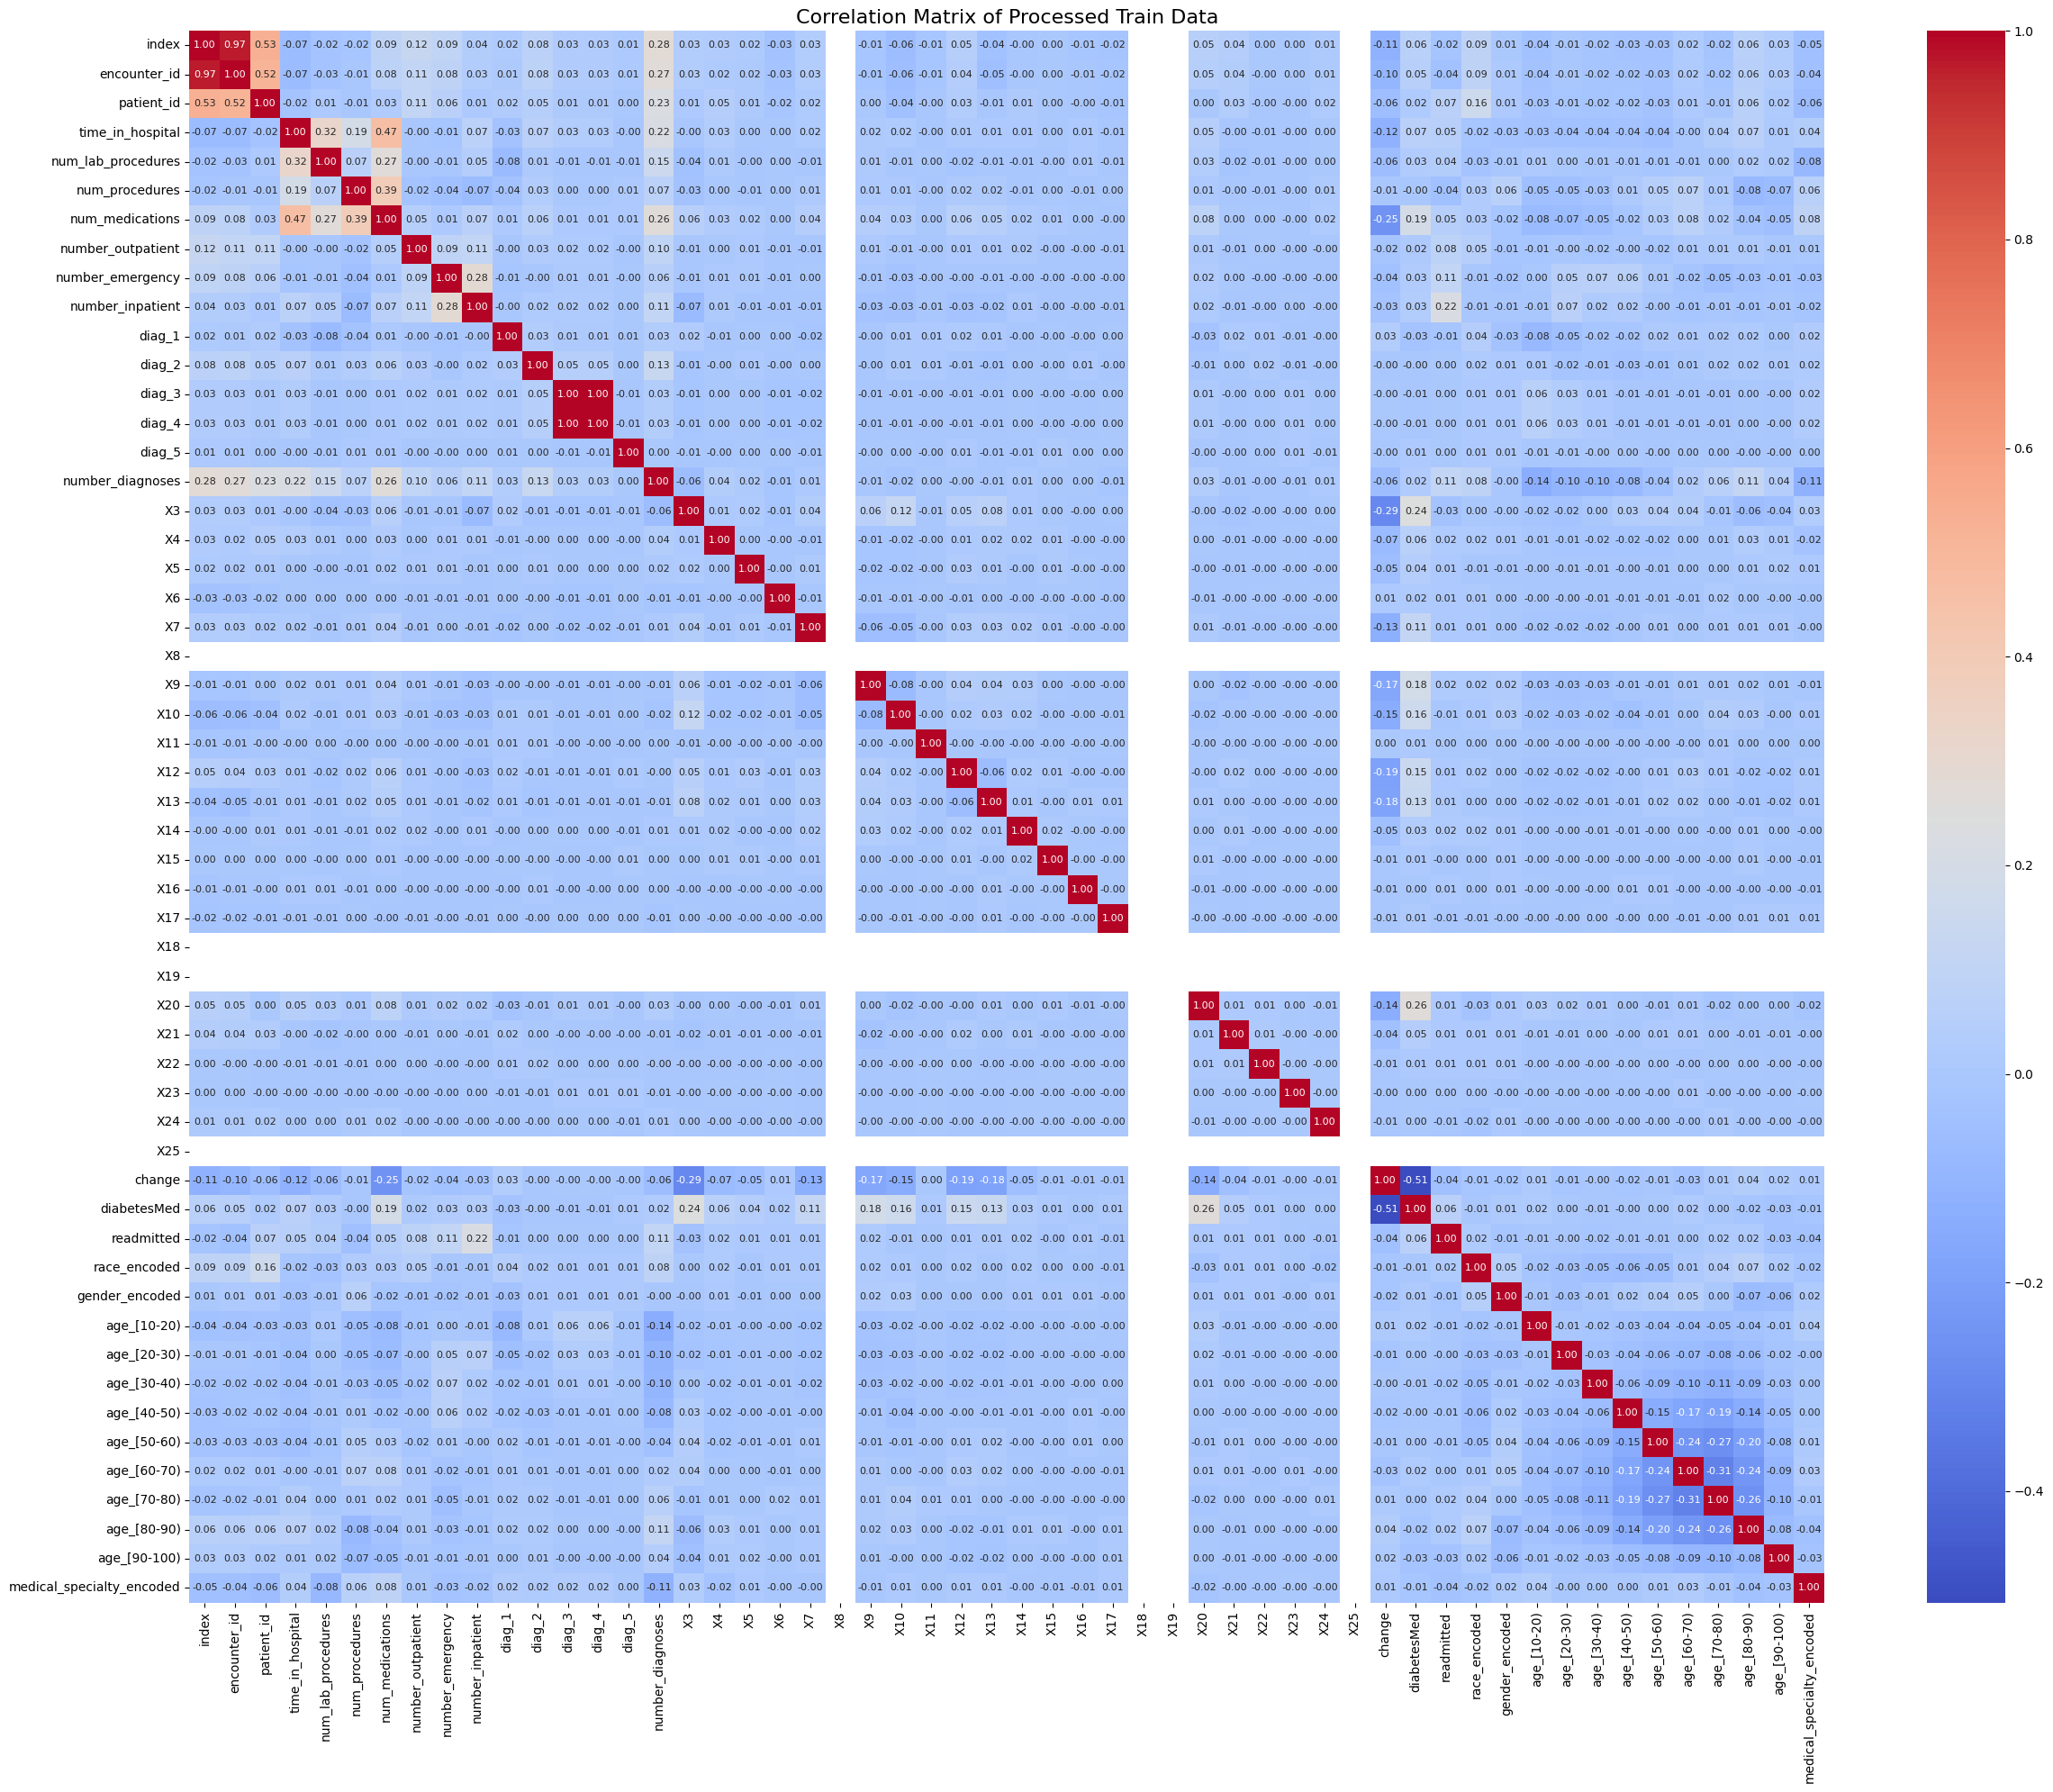

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title('Correlation Matrix of Processed Train Data', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_plot.png')
plt.show()

In [ ]:
columns_to_drop = [
    'X3', 'index', 'X9', 'X4', 'race_encoded', 'X14', 'gender_encoded',
    'diag_1', 'X13', 'X12', 'X20', 'X17', 'X6', 'X16', 'X24', 'X5', 'X7',
    'X21', 'X10', 'X22', 'X23', 'diag_3', 'diag_4', 'diag_5', 'X15', 'X11',
    'diag_2'
]

train_data = train_df.drop(columns=columns_to_drop, axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      66587 non-null  int64  
 1   encounter_id               66587 non-null  int64  
 2   patient_id                 66587 non-null  int64  
 3   time_in_hospital           66587 non-null  int64  
 4   num_lab_procedures         66587 non-null  int64  
 5   num_procedures             66587 non-null  int64  
 6   num_medications            66587 non-null  int64  
 7   number_outpatient          66587 non-null  int64  
 8   number_emergency           66587 non-null  int64  
 9   number_inpatient           66587 non-null  int64  
 10  diag_1                     66587 non-null  int64  
 11  diag_2                     66587 non-null  int64  
 12  diag_3                     66587 non-null  int64  
 13  diag_4                     66587 non-null  int

In [ ]:
test_df = test_df.drop(['X1','X2'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
test_df['race_encoded'] = le.fit_transform(test_df['race'])
test_data = test_df.drop(['race'],axis=1)

le = LabelEncoder()
test_data['gender_encoded'] = le.fit_transform(test_df['gender'])
test_data = test_data.drop(['gender'],axis=1)

In [ ]:
test_data = test_data.drop(['weight'],axis=1)

In [ ]:
test_data = pd.get_dummies(test_data, columns=['age'], drop_first=True)

for col in test_data.select_dtypes(include=['bool']).columns:
    test_data[col] = test_data[col].astype(int)

In [ ]:
import numpy as np

test_data['medical_specialty'] = test_data['medical_specialty'].replace('?', np.nan)
mode_medical_specialty = test_data['medical_specialty'].mode()[0]
test_data['medical_specialty'] = test_data['medical_specialty'].fillna(mode_medical_specialty)

le = LabelEncoder()
test_data['medical_specialty_encoded'] = le.fit_transform(test_data['medical_specialty'])
test_data = test_data.drop('medical_specialty', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_columns_to_encode = [
    'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
    'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
    'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25'
]

for col in x_columns_to_encode:
    test_data[col] = le.fit_transform(test_data[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

remaining_object_cols = [
    'diag_1', 'diag_2', 'diag_3', 'diag_4',
    'change', 'diabetesMed'
]

for col in remaining_object_cols:
    test_data[col] = le.fit_transform(test_data[col])

In [ ]:
columns_to_drop = [
    'X3', 'index', 'X9', 'X4', 'race_encoded', 'X14', 'gender_encoded',
    'diag_1', 'X13', 'X12', 'X20', 'X17', 'X6', 'X16', 'X24', 'X5', 'X7',
    'X21', 'X10', 'X22', 'X23', 'diag_3', 'diag_4', 'diag_5', 'X15', 'X11',
    'diag_2'
]

test_data = test_data.drop(columns=columns_to_drop, axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   encounter_id               16647 non-null  int64
 1   patient_id                 16647 non-null  int64
 2   time_in_hospital           16647 non-null  int64
 3   num_lab_procedures         16647 non-null  int64
 4   num_procedures             16647 non-null  int64
 5   num_medications            16647 non-null  int64
 6   number_outpatient          16647 non-null  int64
 7   number_emergency           16647 non-null  int64
 8   number_inpatient           16647 non-null  int64
 9   number_diagnoses           16647 non-null  int64
 10  X8                         16647 non-null  int64
 11  X18                        16647 non-null  int64
 12  X19                        16647 non-null  int64
 13  X25                        16647 non-null  int64
 14  change                

In [ ]:
X = train_data.drop('readmitted', axis=1)
y = train_data['readmitted']


print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),medical_specialty_encoded
0,197029140,51521940,4,39,1,9,1,1,4,9,...,0,0,0,0,0,0,0,1,0,7
1,163571946,92631357,3,34,1,12,0,0,0,6,...,0,0,0,0,0,1,0,0,0,7
2,256497366,30023982,6,50,2,24,0,0,5,9,...,0,0,0,0,1,0,0,0,0,18
3,289891212,93606021,5,63,0,14,0,0,0,7,...,0,0,0,0,0,0,1,0,0,17
4,81873900,23464296,9,17,1,11,0,0,0,9,...,0,0,0,0,0,0,1,0,0,42



Target (y) head:


,readmitted
0,1
1,0
2,1
3,1
4,1


In [ ]:
X_test = test_data.copy()


print("Test Features (X_test) head:")
display(X_test.head())

Test Features (X_test) head:


,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),medical_specialty_encoded
0,46325466,3928383,3,45,3,10,0,0,1,8,...,0,0,0,0,0,0,1,0,0,13
1,245219616,60926103,2,10,1,16,1,0,0,5,...,0,0,0,0,0,1,0,0,0,13
2,155321232,25234848,11,41,1,15,0,0,1,9,...,0,0,0,0,0,0,1,0,0,13
3,179491944,86935374,1,71,2,11,0,0,0,9,...,0,0,0,0,0,0,1,0,0,13
4,7425954,2486826,7,59,2,18,0,0,0,7,...,0,0,0,0,1,0,0,0,0,13


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (53269, 26)
X_val shape: (13318, 26)
y_train shape: (53269,)
y_val shape: (13318,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_model = LogisticRegression(max_iter=1000)
print("Logistic Regression model initialized.")

Logistic Regression model initialized.


In [ ]:
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_val)

accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"Logistic Regression F1-score: {f1_log_reg:.4f}")

Logistic Regression Accuracy: 0.5674
Logistic Regression Precision: 0.5494
Logistic Regression Recall: 0.3278
Logistic Regression F1-score: 0.4106


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc_model = DecisionTreeClassifier(random_state=42)
print("Decision Tree model initialized.")

Decision Tree model initialized.


In [ ]:
dtc_model.fit(X_train, y_train)

y_pred_dtc = dtc_model.predict(X_val)

accuracy_dtc = accuracy_score(y_val, y_pred_dtc)
precision_dtc = precision_score(y_val, y_pred_dtc)
recall_dtc = recall_score(y_val, y_pred_dtc)
f1_dtc = f1_score(y_val, y_pred_dtc)

print(f"Decision Tree Accuracy: {accuracy_dtc:.4f}")
print(f"Decision Tree Precision: {precision_dtc:.4f}")
print(f"Decision Tree Recall: {recall_dtc:.4f}")
print(f"Decision Tree F1-score: {f1_dtc:.4f}")

Decision Tree Accuracy: 0.7446
Decision Tree Precision: 0.7225
Decision Tree Recall: 0.7219
Decision Tree F1-score: 0.7222


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


rf_model = RandomForestClassifier(random_state=42)
print("Random Forest model initialized.")

Random Forest model initialized.


In [ ]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

Random Forest Accuracy: 0.7933
Random Forest Precision: 0.7950
Random Forest Recall: 0.7416
Random Forest F1-score: 0.7674


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


gbc_model = GradientBoostingClassifier(random_state=42)
print("Gradient Boosting model initialized.")

Gradient Boosting model initialized.


In [ ]:
gbc_model.fit(X_train, y_train)

y_pred_gbc = gbc_model.predict(X_val)

accuracy_gbc = accuracy_score(y_val, y_pred_gbc)
precision_gbc = precision_score(y_val, y_pred_gbc)
recall_gbc = recall_score(y_val, y_pred_gbc)
f1_gbc = f1_score(y_val, y_pred_gbc)

print(f"Gradient Boosting Accuracy: {accuracy_gbc:.4f}")
print(f"Gradient Boosting Precision: {precision_gbc:.4f}")
print(f"Gradient Boosting Recall: {recall_gbc:.4f}")
print(f"Gradient Boosting F1-score: {f1_gbc:.4f}")

Gradient Boosting Accuracy: 0.6496
Gradient Boosting Precision: 0.6379
Gradient Boosting Recall: 0.5501
Gradient Boosting F1-score: 0.5907


In [ ]:
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_log_reg, accuracy_dtc, accuracy_rf, accuracy_gbc],
    'Precision': [precision_log_reg, precision_dtc, precision_rf, precision_gbc],
    'Recall': [recall_log_reg, recall_dtc, recall_rf, recall_gbc],
    'F1-score': [f1_log_reg, f1_dtc, f1_rf, f1_gbc]
})

print("\nModel Performance Comparison:")
display(model_performance.sort_values(by='F1-score', ascending=False))


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-score
2,Random Forest,0.793287,0.794993,0.741630,0.767385
1,Decision Tree,0.744631,0.722458,0.721868,0.722163
3,Gradient Boosting,0.649572,0.637879,0.550057,0.590722
0,Logistic Regression,0.567352,0.549411,0.327780,0.410597


In [ ]:
import gradio as gr
import pandas as pd

def predict_readmission(
    encounter_id,
    patient_id,
    time_in_hospital,
    num_lab_procedures,
    num_procedures,
    num_medications,
    number_outpatient,
    number_emergency,
    number_inpatient,
    number_diagnoses,
    X8,
    X18,
    X19,
    X25,
    change,
    diabetesMed,
    age_10_20,
    age_20_30,
    age_30_40,
    age_40_50,
    age_50_60,
    age_60_70,
    age_70_80,
    age_80_90,
    age_90_100,
    medical_specialty_encoded
):
    input_data = pd.DataFrame([{
        'encounter_id': encounter_id,
        'patient_id': patient_id,
        'time_in_hospital': time_in_hospital,
        'num_lab_procedures': num_lab_procedures,
        'num_procedures': num_procedures,
        'num_medications': num_medications,
        'number_outpatient': number_outpatient,
        'number_emergency': number_emergency,
        'number_inpatient': number_inpatient,
        'number_diagnoses': number_diagnoses,
        'X8': X8,
        'X18': X18,
        'X19': X19,
        'X25': X25,
        'change': change,
        'diabetesMed': diabetesMed,
        'age_[10-20)': age_10_20,
        'age_[20-30)': age_20_30,
        'age_[30-40)': age_30_40,
        'age_[40-50)': age_40_50,
        'age_[50-60)': age_50_60,
        'age_[60-70)': age_60_70,
        'age_[70-80)': age_70_80,
        'age_[80-90)': age_80_90,
        'age_[90-100)': age_90_100,
        'medical_specialty_encoded': medical_specialty_encoded
    }])


    prediction = rf_model.predict(input_data)


    if prediction[0] == 1:
        return "Patient is likely to be readmitted."
    else:
        return "Patient is unlikely to be readmitted."

inputs = [
    gr.Number(label='Encounter ID'),
    gr.Number(label='Patient ID'),
    gr.Number(label='Time in Hospital (days)'),
    gr.Number(label='Number of Lab Procedures'),
    gr.Number(label='Number of Procedures'),
    gr.Number(label='Number of Medications'),
    gr.Number(label='Number of Outpatient Visits'),
    gr.Number(label='Number of Emergency Visits'),
    gr.Number(label='Number of Inpatient Visits'),
    gr.Number(label='Number of Diagnoses'),
    gr.Number(label='X8 (Encoded)'),
    gr.Number(label='X18 (Encoded)'),
    gr.Number(label='X19 (Encoded)'),
    gr.Number(label='X25 (Encoded)'),
    gr.Radio([0, 1], label='Change (0=No, 1=Ch)'),
    gr.Radio([0, 1], label='Diabetes Medication (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [10-20) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [20-30) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [30-40) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [40-50) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [50-60) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [60-70) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [70-80) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [80-90) (0=No, 1=Yes)'),
    gr.Radio([0, 1], label='Age: [90-100) (0=No, 1=Yes)'),
    gr.Number(label='Medical Specialty (Encoded)')
]

output = gr.Textbox(label='Readmission Prediction')

gr.Interface(fn=predict_readmission, inputs=inputs, outputs=output, title='Patient Readmission Prediction').launch(debug=True)




It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a375c4f321187572da.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
